<a href="https://colab.research.google.com/github/shubham-bari/StockPrediction/blob/main/Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r'/content/HistoricalQuotes.csv')

In [ ]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [ ]:
df = df.iloc[:,3:4]

In [ ]:
df[' Open']=df[' Open'].str.replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df=df[' Open']

In [ ]:
df.shape

(2518, 1)

In [ ]:
open2=[]
j=2517
for i in range(0,2518):
  open2.append(df[j])
  j=j-1
len(open2)

2518

In [ ]:
df['Open2']=open2
df['Open2']

[29.3928,
 29.99,
 29.8486,
 29.8971,
 30.7057,
 31.43,
 31.1871,
 31.9757,
 31.9871,
 32.4814,
 32.1971,
 32.0257,
 32.1286,
 32.0143,
 32.1128,
 31.4957,
 32.2343,
 32.52,
 32.9886,
 32.7071,
 33.2857,
 33.8004,
 33.6414,
 33.9271,
 33.5678,
 34.0286,
 34.2457,
 34.3486,
 34.49,
 34.6,
 34.5514,
 35.04,
 35.1114,
 35.51,
 35.29,
 35.5057,
 36.9721,
 36.8914,
 38.2843,
 38.84,
 38.1814,
 37.6071,
 37.5743,
 38.4728,
 37.6914,
 37.5557,
 36.1471,
 36.2614,
 34.8157,
 35.75,
 35.9771,
 37.035,
 37.6028,
 36.4521,
 36.3857,
 36.7114,
 35.6428,
 34.5543,
 33.26,
 35.3257,
 34.1928,
 35.7257,
 35.8,
 37.0554,
 37.0986,
 37.7914,
 37.8828,
 36.8871,
 36.8986,
 36.1771,
 35.9243,
 34.9771,
 35.4607,
 36.5657,
 36.52,
 37.3,
 38.6571,
 38.8928,
 39.67,
 38.88,
 39.2257,
 38.7143,
 38.58,
 38.1328,
 37.7316,
 36.6728,
 36.3286,
 35.7843,
 35.8571,
 35.7843,
 37.4971,
 36.6986,
 36.9328,
 36.6171,
 35.6257,
 35.4614,
 36.1686,
 35.6971,
 34.7,
 37.87,
 36.8114,
 36.7271,
 37.1428,
 37.2671,
 37

In [ ]:
df.drop(columns=' Open',inplace=True)

In [ ]:


dic={'Open':open2}
dfnew=pd.DataFrame(dic)
dfnew.tail()
df=dfnew

In [ ]:
df.head()

,Open
0,29.3928
1,29.9900
2,29.8486
3,29.8971
4,30.7057


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(df_scaled)):
  x_train.append(df_scaled[i-60:i,0])
  y_train.append(df_scaled[i,0])

np.array(x_train)
np.array(y_train)

array([0.01625206, 0.02144222, 0.02169379, ..., 0.87062684, 0.8522417 ,
       0.77152314])

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

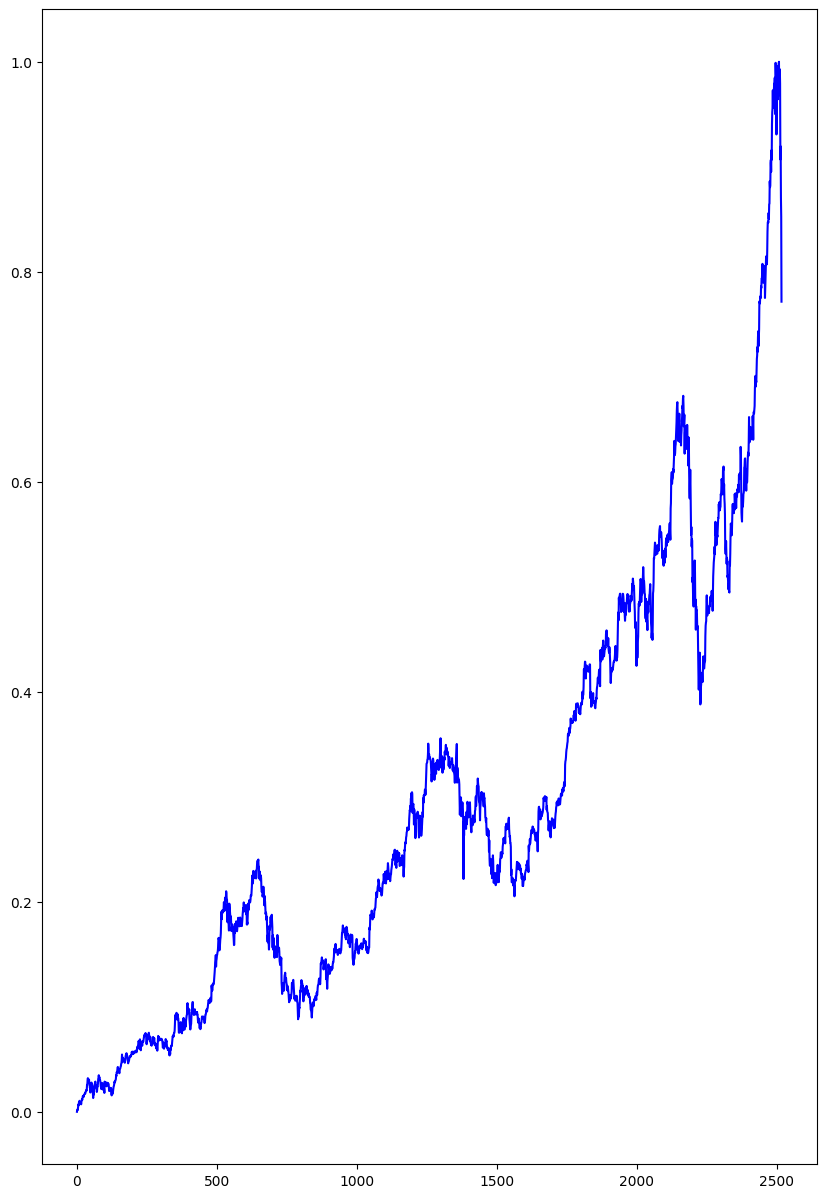

In [ ]:
plt.figure(figsize=(10,15))
plt.plot(df_scaled, color='blue')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, ReLU, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, activation='relu' ,input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
len(y_train)

2458

In [ ]:
x_train[:6]

[array([0.        , 0.00202203, 0.00154327, 0.00170748, 0.00444528,
        0.00689764, 0.00607522, 0.0087453 , 0.0087839 , 0.01045752,
        0.00949493, 0.00891459, 0.009263  , 0.00887599, 0.0092095 ,
        0.00712009, 0.00962088, 0.01058822, 0.01217482, 0.01122171,
        0.01318076, 0.01492345, 0.0143851 , 0.01535244, 0.01413591,
        0.0156961 , 0.01643117, 0.01677957, 0.01725833, 0.01763077,
        0.01746622, 0.01912055, 0.0193623 , 0.02071189, 0.01996701,
        0.02069734, 0.02566234, 0.0253891 , 0.03010525, 0.03198676,
        0.02975684, 0.02781235, 0.0277013 , 0.03074348, 0.02809778,
        0.02763832, 0.02286902, 0.02325602, 0.0183611 , 0.0215245 ,
        0.02229342, 0.02587531, 0.02779779, 0.0239017 , 0.02367688,
        0.02477965, 0.02116153, 0.01747604, 0.01309374, 0.02008788]),
 array([0.00202203, 0.00154327, 0.00170748, 0.00444528, 0.00689764,
        0.00607522, 0.0087453 , 0.0087839 , 0.01045752, 0.00949493,
        0.00891459, 0.009263  , 0.00887599, 0.

In [ ]:
np.shape(x_train)

(2458, 60)

In [ ]:
np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

array([[[0.        ],
        [0.00202203],
        [0.00154327],
        ...,
        [0.01747604],
        [0.01309374],
        [0.02008788]],

       [[0.00202203],
        [0.00154327],
        [0.00170748],
        ...,
        [0.01309374],
        [0.02008788],
        [0.01625206]],

       [[0.00154327],
        [0.00170748],
        [0.00444528],
        ...,
        [0.02008788],
        [0.01625206],
        [0.02144222]],

       ...,

       [[0.79969338],
        [0.80314694],
        [0.80541546],
        ...,
        [0.97927863],
        [0.90695696],
        [0.91945073]],

       [[0.80314694],
        [0.80541546],
        [0.77507828],
        ...,
        [0.90695696],
        [0.91945073],
        [0.87062684]],

       [[0.80541546],
        [0.77507828],
        [0.78442321],
        ...,
        [0.91945073],
        [0.87062684],
        [0.8522417 ]]])

In [ ]:
trainingx=np.array(x_train[:1850])
trainingy=np.array(y_train[:1850])
testingx=np.array(x_train[1850:])
testingy=np.array(y_train[1850:])

In [ ]:
model.fit(trainingx, trainingy, epochs=200, batch_size=32, callbacks=[early_stopping])

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - loss: 7.1573e-04 - mae: 0.0203
Epoch 2/200


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 4.8251e-04 - mae: 0.0164
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 4.8419e-04 - mae: 0.0164
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 4.8873e-04 - mae: 0.0167
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 4.6912e-04 - mae: 0.0160
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 4.2780e-04 - mae: 0.0159
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 4.1898e-04 - mae: 0.0157
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - loss: 4.4731e-04 - mae: 0.0159
Epoch 9/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 4.3138e-04 - mae: 0.0155
Epoch 10/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 4.4802e-04 - mae: 0.0157
Epoch 11/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 4.4878e-04 - mae: 0.0159
Epoch 12/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 4.9678e-04 - mae: 0.0166
Epoch 13/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - 

In [ ]:
np.shape(y_train)

(2458,)

In [ ]:
yhat=model.predict(testingx)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [ ]:
len(trainingy)

len(yhat)

608

In [ ]:
testingy=df[1910:]
testingy=np.array(testingy)
len(testingy)
testingy

array([[153.89  ],
       [153.21  ],
       [154.26  ],
       [154.01  ],
       [153.63  ],
       [154.18  ],
       [154.97  ],
       [155.81  ],
       [156.055 ],
       [155.97  ],
       [156.35  ],
       [156.73  ],
       [157.9   ],
       [159.78  ],
       [160.42  ],
       [156.75  ],
       [156.61  ],
       [156.89  ],
       [156.29  ],
       [156.91  ],
       [157.23  ],
       [159.29  ],
       [163.89  ],
       [167.9   ],
       [169.87  ],
       [167.64  ],
       [174.    ],
       [172.365 ],
       [173.91  ],
       [174.66  ],
       [175.11  ],
       [175.11  ],
       [173.5   ],
       [173.04  ],
       [169.97  ],
       [171.18  ],
       [171.04  ],
       [170.29  ],
       [170.78  ],
       [173.36  ],
       [175.1   ],
       [175.05  ],
       [174.3   ],
       [172.63  ],
       [170.43  ],
       [169.95  ],
       [172.48  ],
       [169.06  ],
       [167.5   ],
       [169.03  ],
       [170.49  ],
       [169.2   ],
       [172.

In [ ]:
yhat=scaler.inverse_transform(yhat)
testingy=scaler.inverse_transform(testingy)

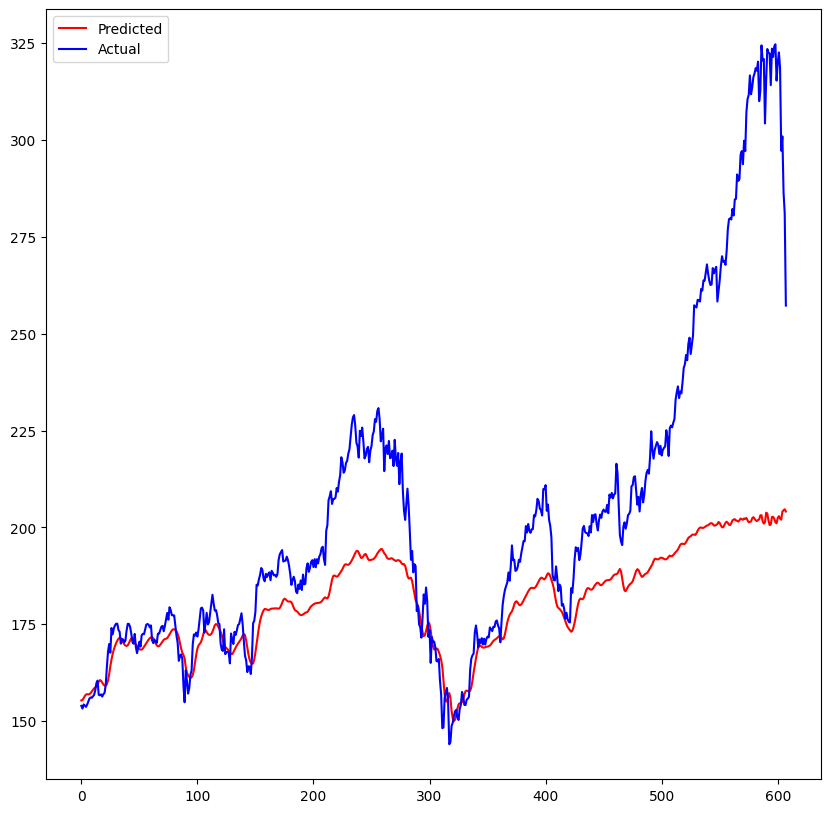

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(yhat, color='red')
plt.plot(testingy, color='blue')
plt.legend(['Predicted', 'Actual'])
plt.xticks=[]
plt.yticks=[]
plt.show()